<a href="https://colab.research.google.com/github/Gramani-Kumar/DL-Demo/blob/master/CIFAR10_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What are we going to do ?

    CIFAR-10 classification with Deep Nuerual Network. 
     1. Try with simple network
     2. Image classification : If a given image we should be able to predict which class or catagory it is.
     3. Use LeNet Network : Tip, LeNet was the first DNN designed by Yann LeCun. Google it or find wiki for more about it. :)  

##By the by, what is CIFAR-10 ?
   Good Question. CIFAR-10, Candadian Institute For Andance Research (University of Toronto). Provided 10 image passed classification data set.
   10 category : Plane, Car, Bird, Car, Deer, Dog, Frog, Horse, Ship and Truck.
   images in each category : 6000
   image size : 32x32

In [ ]:
#import necessary library
import numpy as np
import matplotlib.pyplot as plt
import torch

# Load the data.
   Data provided in the torchvision package itself.

In [ ]:
#import dataset package / library
import torchvision
import torchvision.transforms as transforms  #To process or convert the input into specific dimension

In [ ]:
trainSet = torchvision.datasets.CIFAR10(root="myData",download=True, train=True, transform = transforms.ToTensor())   #Download DataSet and convert into Tensor

Files already downloaded and verified


In [ ]:
#Data Loader. We have downloded data as batch which well compressed format. (PIL)
#Load it now.
trainData = torch.utils.data.DataLoader(trainSet,  batch_size=4, shuffle=True)  #Load image data 4 by 4... Randomly pick your data as well
                                     

In [ ]:
#Define Class which already declared but it will like index / integer
imgClass = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
dataIter = iter(trainData)  #Retrieve Data / Image
imgData = dataIter.next()  #Todo structure detail about dataIter.next() return: 
 #Currently convience dataIter.next() returns List of Images and List of True value in a list.
 # [[Imag1,Imag2,Img3,Img4],[1,2,3,4]] , Each image having row and column.  


In [ ]:
#Lets get a batch.
img, label = dataIter.next()

In [ ]:
#Lets check what are the sizes.
print(img.shape) 
print(label.shape)
print(label.size())

torch.Size([4, 3, 32, 32])
torch.Size([4])
torch.Size([4])


#Lets Visualise data

In [ ]:
print(label)

tensor([5, 0, 3, 3])


In [ ]:
tImage = img[1]

In [ ]:
tImage.shape  #It is a image size. To Plot an image it should be converted to NumPy

torch.Size([3, 32, 32])

In [ ]:
#Convert into Numpy from Tensor
npImage = tImage.numpy()

In [ ]:
#Before Plotting there is a trick we have to do.
#The Dimension of a image would be x,y,z ie, z represent number of channel but when you look the data of tensor it is
# ordered in some other way (z,x,y). This we need to sort it out this issue by re-allinging its positions.
# use np.transpose() to re-arrange it.

nptImage = npImage.transpose(1, 2, 0)
print(nptImage.shape)  #It would be converted to [32,32,3]


(32, 32, 3)


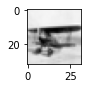

In [ ]:
#Plot it.
plt.figure(figsize=(1,1))  #TODO figure of what is the prameter says.
plt.imshow(nptImage)  #Imshow it is very popular function to draw for Image.
plt.show()            #Plot / show the image.

In [ ]:
#It is image of airoplane so what is label. check the tensor variable.
print(imgClass[label[1].item()])


Plane


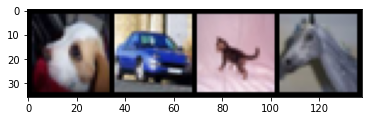

Dog Car Cat Horse


In [ ]:
def myImgShow(tImage):
  npTImg = tImage.numpy()
  plt.imshow(npTImg.transpose(1, 2, 0))
  plt.show() 


myImgShow(torchvision.utils.make_grid(img))  
print(' '.join(imgClass[label[i]] for i in range(4)))

In [ ]:
t = torchvision.utils.make_grid(img)

In [ ]:
t.shape

torch.Size([3, 36, 138])

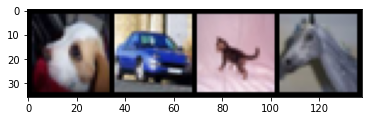

In [ ]:
a = t.numpy()
plt.imshow(a.transpose(1, 2, 0))
plt.show()


#Single Convolution Layer 

In [ ]:
#Just for fun create simple Convolution Network with one layer.

#Lets construct very simple Convolution network:
   #input channel  = 3 (3 channles of RGB in the image) 
   #Ouput channel  = number convoluted images (= number of kernel)
   #Size of the kernel = 3 (size we have small image)

import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.net = nn.Conv2d(3, 18, 3)  #3 input, 18 output, 3x3 kernel size.

  def forward(self, iX):
    x = self.net(iX)
    return x


In [ ]:
#Creat an Instance.
testNet = FirstCNN()

output = testNet(img)

In [ ]:
#lets check output 
output.shape

torch.Size([4, 18, 30, 30])

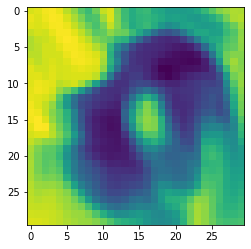

In [ ]:
#we got 4,18,30,30 : which means: 4 images convoluted parallelly and provided 18 output.
#Size reduced because of padding not provided. 3x3 will truncate all the side.

tOut = output.detach().numpy()
plt.imshow(tOut[0,14,:,:]) 
plt.show() #here you go..

#Deep Convolutional Neural Network
  Create dummy network and to the convolution operation 
  Check the ouptput all the layer.

In [ ]:
class SecondCNN(nn.Module):
  def __init__(self):
    super(SecondCNN, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(3, 16, 3),
        nn.ReLU(),
        nn.Conv2d(16, 10, 3),
        nn.Conv2d(10, 26, 5)
    )

  def forward(self, X):
    output = self.net(X)
    return output


In [ ]:
#object
net = SecondCNN()
output = net(img)

In [ ]:
output.shape

torch.Size([4, 26, 24, 24])

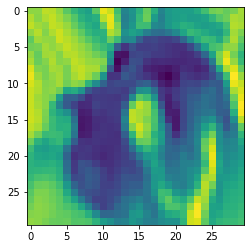

In [ ]:
plt.show(plt.imshow(output.detach().numpy()[0,0,:,:]))

#LeNet 
  Construct LeNet 
  LeNet : Very first network of modleing image classification with 32x32 input.

In [ ]:
class myLeNet(nn.Module):
  def __init__(self):
    super(myLeNet, self).__init__()
    self.cnnModel = nn.Sequential(
        nn.Conv2d(3, 6, 5),         #N,3,32,32 -> N,6,28,28
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),  #N,6,28,28 -> N,6,14,14
        nn.Conv2d(6, 16, 5),         #N,6,14,14 -> N,16,10,10
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)   #N,16,10,10 -> N,16,5,5   
    )

    self.fcModel = nn.Sequential(
        nn.Linear(400, 120),        # N, 400  N,120 
        nn.Tanh(),
        nn.Linear(120,84),          # N, 120  N,84
        nn.Tanh(),
        nn.Linear(84, 10)           # N   84, 10
    )

  def forward(self, X):
      #print("Input size ", X.shape)
  
      iO = self.cnnModel(X)

      #print("Convoluted output Shape", iO.shape)

      #Need to Flatten the squre type input.
      iO = iO.view(iO.size(0), -1)                        #Flatten 4x16x5x5. => 4x(16x5x5)

      #print("Flatten Output", iO.shape)
      output = self.fcModel(iO)

      #print("Output size ", output.shape)

      return output


In [ ]:
  #Create object for network
  leNet = myLeNet()
  output = leNet(img)

Input size  torch.Size([4, 3, 32, 32])
Convoluted output Shape torch.Size([4, 16, 5, 5])
Flatten Output torch.Size([4, 400])
Output size  torch.Size([4, 10])


In [ ]:
print(output)

tensor([[ 0.0154, -0.0164, -0.0155, -0.0487,  0.0541,  0.1399, -0.0962,  0.1132,
          0.0711,  0.1197],
        [ 0.0152, -0.0144, -0.0181, -0.0273,  0.0354,  0.1065, -0.1141,  0.0859,
          0.0668,  0.1028],
        [ 0.0197, -0.0215, -0.0444, -0.0611,  0.0454,  0.1215, -0.1205,  0.1080,
          0.0700,  0.1074],
        [ 0.0219, -0.0124, -0.0234, -0.0451,  0.0443,  0.1242, -0.1269,  0.0942,
          0.0641,  0.0850]], grad_fn=<AddmmBackward>)


In [ ]:
#check what it is predicting.
max_value, pred_class = output.max(dim=1)
print(pred_class)

tensor([5, 5, 5, 5])


In [ ]:
max_value, pred_class = torch.max(output, dim=1)
print(pred_class)
print(max_value)

tensor([5, 5, 5, 5])
tensor([0.1399, 0.1065, 0.1215, 0.1242], grad_fn=<MaxBackward0>)


#Train the LeNet

In [ ]:
#create TestData, TrainData
batchSize = 128   #Higher batch size.
trainSet = torchvision.datasets.CIFAR10(root="myData", train=True, transform=torchvision.transforms.ToTensor(), download=True)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size= batchSize, shuffle=True) #

testSet = torchvision.datasets.CIFAR10(root="myData", train=False, transform= torchvision.transforms.ToTensor(), download= True)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batchSize, shuffle=False) #Not required to set for Shuffle.
 

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def evaluation(dataLoader, network):
  total = 0
  correct = 0
  for data in dataLoader:
    #Set the input and output
    inputs, labels = data # remember (images, labels)
    output = network(inputs)
    #Just predict Maxvalue which is predicted as class in this iteration
    _,pred = output.max(dim=1)
    total += labels.size(0) #total imges in the batch (128 in our case)
    #correct one.
    correct += (pred == labels).sum().item() # How many we predicted as true

  return 100 * correct/total #Total percentage.  



In [ ]:
#Create object of Network for train
leNet = myLeNet()


In [ ]:
import torch.optim as optim
#import torch.nn.functional as F

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(leNet.parameters()) 


Epoch : 0/32, Test acc 49.08, Train acc:50.25
Epoch : 1/32, Test acc 50.81, Train acc:52.97
Epoch : 2/32, Test acc 51.91, Train acc:54.54
Epoch : 3/32, Test acc 52.29, Train acc:56.03
Epoch : 4/32, Test acc 53.38, Train acc:57.70
Epoch : 5/32, Test acc 54.29, Train acc:59.15
Epoch : 6/32, Test acc 54.63, Train acc:60.23
Epoch : 7/32, Test acc 55.00, Train acc:61.37
Epoch : 8/32, Test acc 55.27, Train acc:62.48
Epoch : 9/32, Test acc 55.32, Train acc:63.02
Epoch : 10/32, Test acc 55.27, Train acc:63.85
Epoch : 11/32, Test acc 55.83, Train acc:65.09
Epoch : 12/32, Test acc 56.01, Train acc:66.04
Epoch : 13/32, Test acc 55.27, Train acc:65.61
Epoch : 14/32, Test acc 55.97, Train acc:67.12
Epoch : 15/32, Test acc 55.68, Train acc:67.29
Epoch : 16/32, Test acc 56.07, Train acc:68.28
Epoch : 17/32, Test acc 55.94, Train acc:68.59
Epoch : 18/32, Test acc 55.98, Train acc:69.11
Epoch : 19/32, Test acc 55.70, Train acc:70.24
Epoch : 20/32, Test acc 55.90, Train acc:70.64
Epoch : 21/32, Test acc

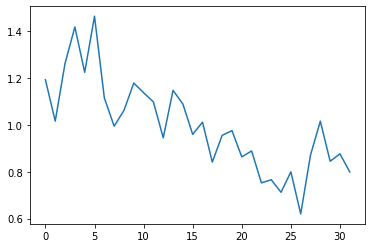

CPU times: user 15min 56s, sys: 23.4 s, total: 16min 19s
Wall time: 16min 22s


In [ ]:
#Train the data with Network
%%time
lossArray= []
lossEpochArr=[]
setEpoch = 32

for epoch in range(setEpoch):
  for i, data in enumerate(trainLoader, 0):
    input, label = data

    opt.zero_grad()
    output = leNet(input)
    loss = loss_fn(output, label)
    loss.backward()

    opt.step()

    lossArray.append(loss.item())

  lossEpochArr.append(loss.item())

  print("Epoch : %d/%d, Test acc %0.2f, Train acc:%0.2f" % (epoch, setEpoch, evaluation(testLoader, leNet),evaluation(trainLoader, leNet)))  


plt.plot(lossEpochArr)
plt.show()   

##Result:
  #Epoch : 31/32, Test acc 54.67, Train acc:75.79

  Which means, We are able to predict the accuracy of 75.79%. 
  Issues :
    1. Test accuracy just around 55% : This need to increased by tunning Hyperparametets :
       
*   increase epoch (seems not good option)
*   change the activation function
*   Use options on optimization.
*   Learning rate.




       
       .
       




In [ ]:
#Get the retrieved old data
img.shape

torch.Size([4, 3, 32, 32])

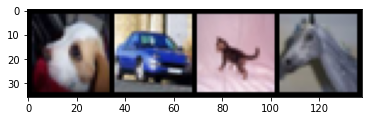

In [ ]:
#plt.show(plt.imshow(img.detach.numpy().transpose(1,2,0)))
t = torchvision.utils.make_grid(img)
plt.imshow(t.numpy().transpose(1,2,0))


In [ ]:
print(img.shape)
print(img[0].shape)
out = leNet.cnnModel[0](img)
#leNet(ima)
newNet = myLeNet()

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])


In [ ]:
#newNet(img)
#out = newNet.cnnModel[0](img[1])
out.shape

torch.Size([4, 6, 28, 28])

In [ ]:
out.shape

torch.Size([4, 6, 28, 28])